In [10]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('gmails_test.db')
query = "SELECT * FROM proposed_ceremonies"
# query = "SELECT * FROM users"

<AxesSubplot: xlabel='month'>

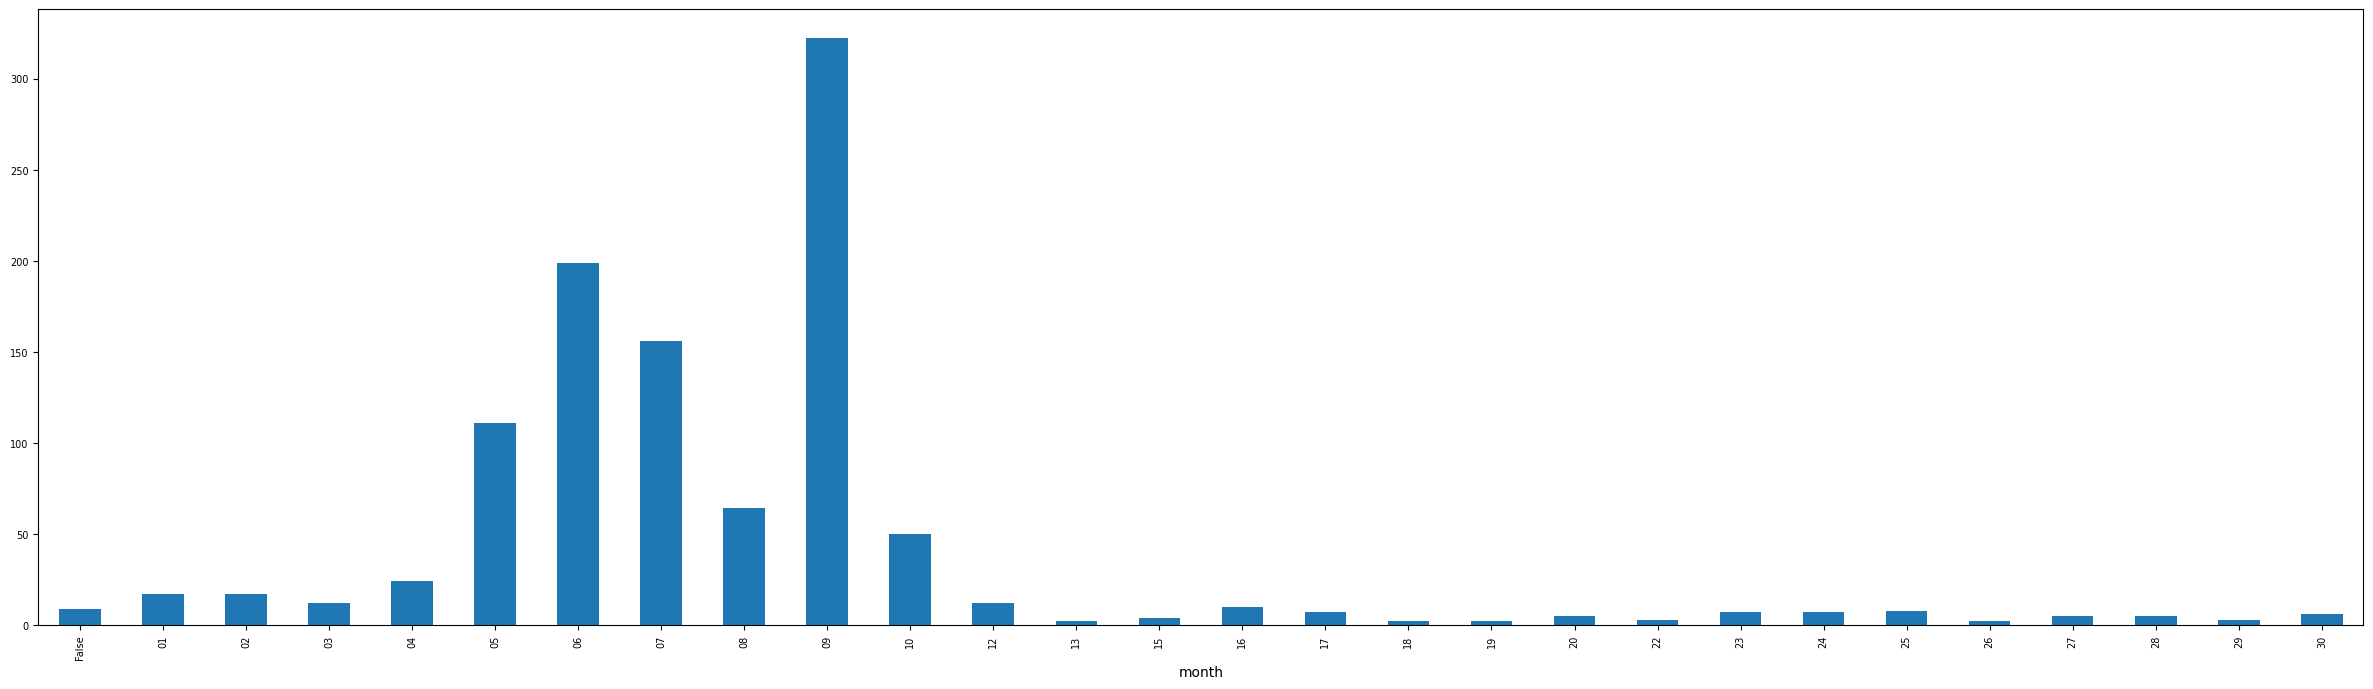

In [107]:
df = pd.read_sql_query(query, conn)
# df.groupby(['date']).size().plot(kind='bar')
# df['date'].hist()
# plt.show()



df['people'] = df['people'].apply(lambda x: "".join(x.split()))
df['people'] = df['people'].apply(clean_people)

df['date'] = df['date'].apply(clean_date)
df['month'] = df['date'].apply(lambda x: x is not None and x.split('-')[0])
df = df.loc[:, ~df.columns.isin(['comments', '_id'])]
# .to_csv('ceremonies.txt', sep='\t', index=False)
# df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
df = df[df.duplicated(subset=["date"], keep=False)]
df['bin'] = pd.cut(df['people'], [0, 50, 100, 150, 200, 300, 500])
# df['bin'].value_counts().plot(kind='bar')
# df = df[df['date'].apply(lambda x: x is not None and x.isnumeric())]
df.groupby(['month']).size().plot(kind='bar', figsize=(30, 8), fontsize=7)
# df.groupby(['people']).size().plot(kind='bar', figsize=(30, 8), fontsize=7)